## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Load Dataset**

In [6]:
df = pd.read_csv('final.csv')

df.head()

,created_at,entry_id,field1,field2,latitude,longitude,elevation,status
0,2024-12-11T12:41:13+00:00,1,402.81,0.64,NaN,NaN,NaN,NaN
1,2024-12-11T12:41:29+00:00,2,402.69,0.65,NaN,NaN,NaN,NaN
2,2024-12-11T12:41:45+00:00,3,402.76,0.64,NaN,NaN,NaN,NaN
3,2024-12-11T12:42:01+00:00,4,402.66,0.65,NaN,NaN,NaN,NaN
4,2024-12-11T12:42:17+00:00,5,402.66,0.65,NaN,NaN,NaN,NaN


In [7]:
df.drop(columns=['entry_id','latitude', 'longitude', 'elevation', 'status'], inplace=True)

df.head()

,created_at,field1,field2
0,2024-12-11T12:41:13+00:00,402.81,0.64
1,2024-12-11T12:41:29+00:00,402.69,0.65
2,2024-12-11T12:41:45+00:00,402.76,0.64
3,2024-12-11T12:42:01+00:00,402.66,0.65
4,2024-12-11T12:42:17+00:00,402.66,0.65


In [8]:
df.rename(columns={'field1': 'CO2', 'field2': 'CO'}, inplace=True)

df.tail(3)

,created_at,CO2,CO
160782,2025-01-12T01:09:41+00:00,424.71,0.80
160783,2025-01-12T01:09:57+00:00,425.55,0.80
160784,2025-01-12T01:10:13+00:00,431.22,0.81


In [9]:
df['created_at'] = pd.to_datetime(df['created_at'])

Mengubah created at sebagai index dari data frame

In [11]:
# Set kolom 'created_at' sebagai index
df = df.set_index('created_at')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160785 entries, 2024-12-11 12:41:13+00:00 to 2025-01-12 01:10:13+00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   CO2     160785 non-null  float64
 1   CO      160785 non-null  float64
dtypes: float64(2)
memory usage: 3.7 MB


Data CO2 dan CO dari pembacaan sensor MQ7 dan MQ135 dari tanggal 2024-12-11 sd. 2025-01-12

Visualisasi data CO2 sebelum dilakukannya resampling maupun preprocessing

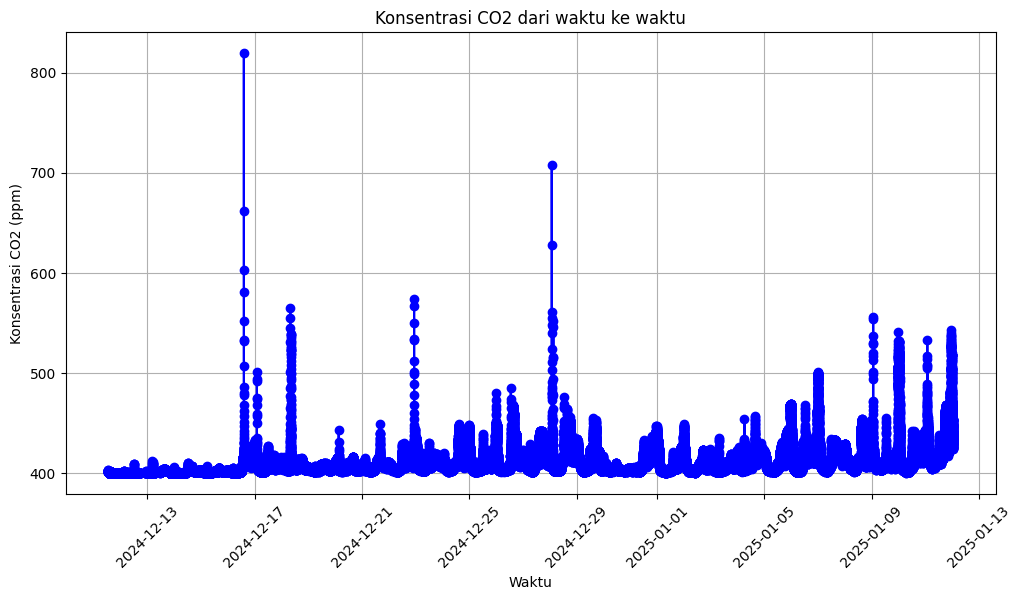

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['CO2'], marker='o', color='blue')
plt.title('Konsentrasi CO2 dari waktu ke waktu')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi CO2 (ppm)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

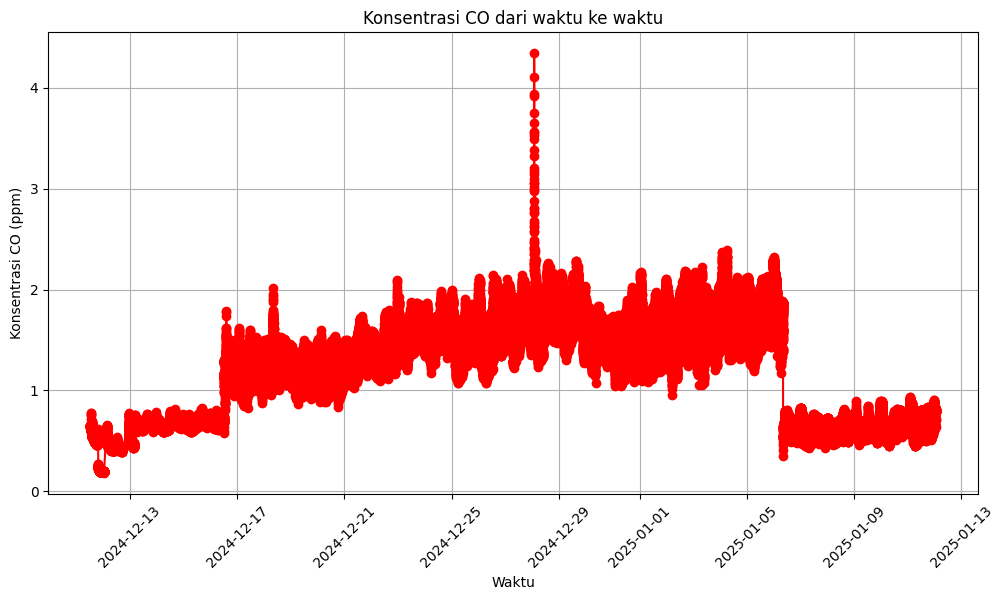

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['CO'], marker='o', color='red')
plt.title('Konsentrasi CO dari waktu ke waktu')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi CO (ppm)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Melakukan resampling per 2 menit dengan tujuan untuk dapat meningkatkan tren dari data dan mengurangi nilai outliers akibat dari kesalahan bada pada data sensor

In [15]:
# Resample per menit, ambil mean (rata-rata) untuk setiap menit
df_per_2menit = df.resample('2min').mean()
# df_per_2menit = df_per_2menit.round(2) # membulatkan pembacaan sensor menjadi 2 desimal
df_per_2menit.head()

,CO2,CO
created_at,,
2024-12-11 12:40:00+00:00,402.753333,0.643333
2024-12-11 12:42:00+00:00,402.695000,0.646250
2024-12-11 12:44:00+00:00,402.726667,0.655000
2024-12-11 12:46:00+00:00,NaN,NaN
2024-12-11 12:48:00+00:00,NaN,NaN


plot korelasi dari CO, dan CO2

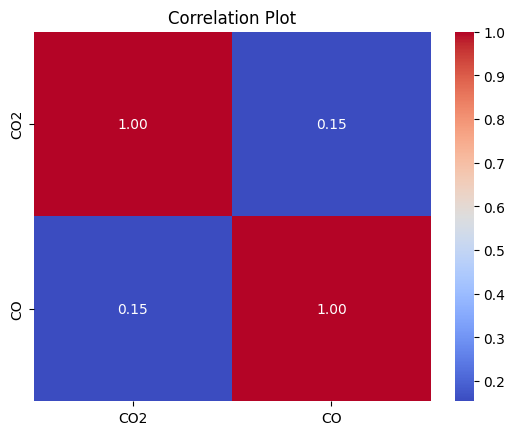

In [16]:
correlation = df_per_2menit[['CO2', 'CO']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Plot')
plt.show()

Visualisasi data CO2 dan CO selama dalam waktu seminggu, dengan data yang sudah di resample per 2 menit

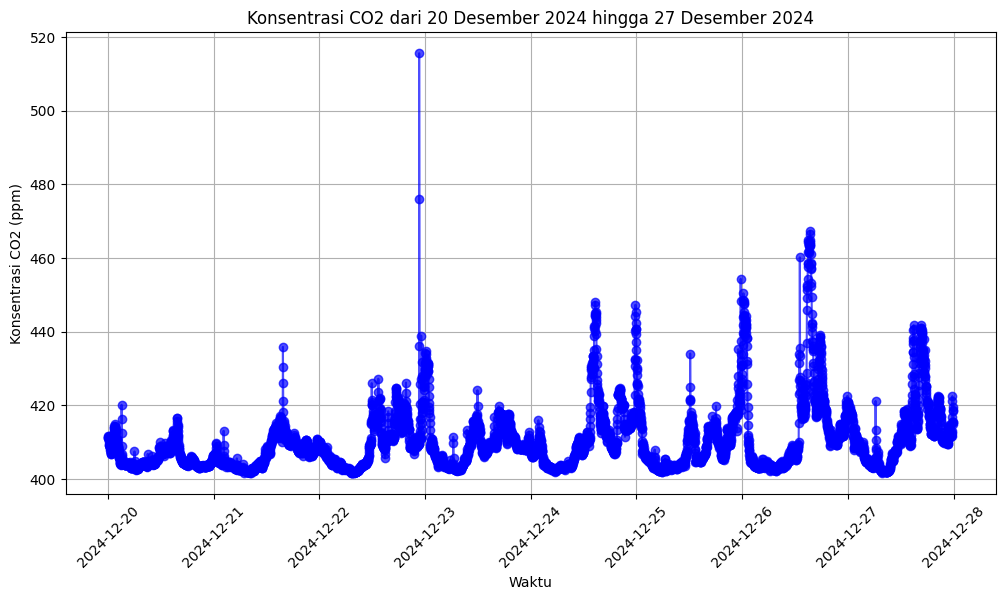

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df_per_2menit['CO2']['2024-12-20':'2024-12-27'].round(2), marker='o', color='blue', alpha=0.7)
plt.title('Konsentrasi CO2 dari 20 Desember 2024 hingga 27 Desember 2024')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi CO2 (ppm)')
plt.grid()
plt.xticks(rotation=45)
plt.show()

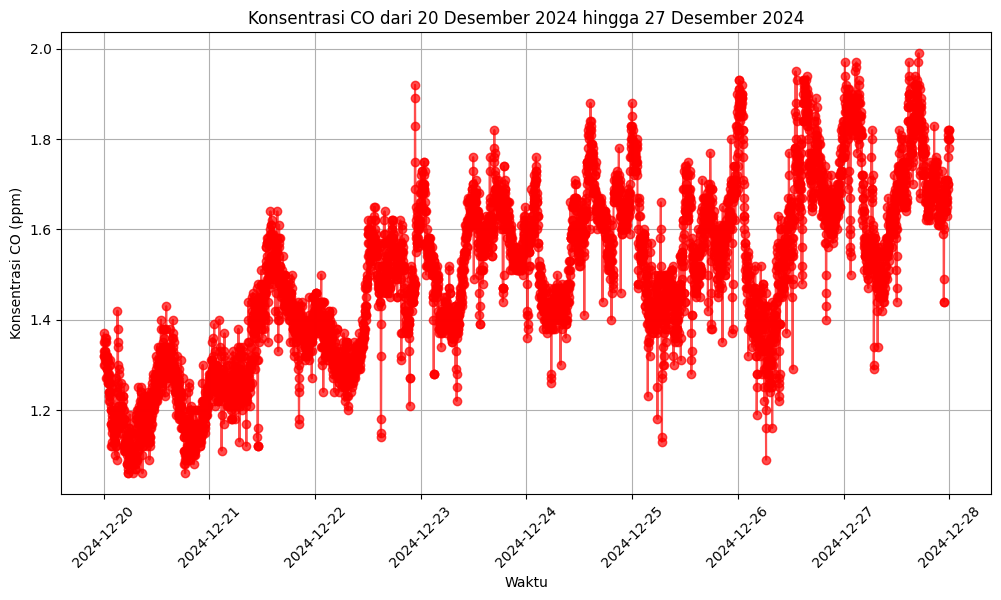

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df_per_2menit['CO']['2024-12-20':'2024-12-27'].round(2), marker='o', color='red', alpha=0.7)
plt.title('Konsentrasi CO dari 20 Desember 2024 hingga 27 Desember 2024')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi CO (ppm)')
plt.grid()
plt.xticks(rotation=45)
plt.show()

Berikut adalah distribusi dari dari CO2 dan CO

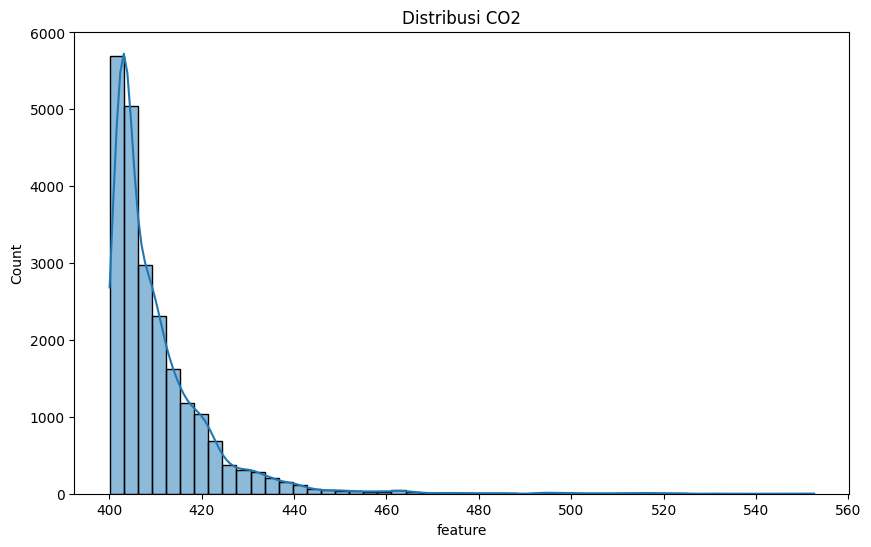

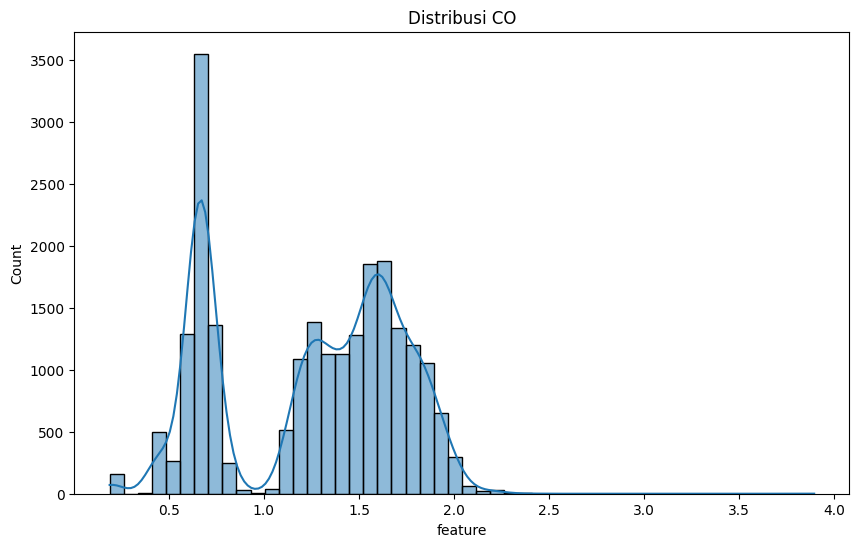

In [19]:
numeric_feature = ["CO2", "CO"]

for feature in numeric_feature:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_per_2menit[feature], kde=True, bins=50)
    plt.title(f"Distribusi {feature}")
    plt.xlabel("feature")

Box Plot dari CO2 dan CO

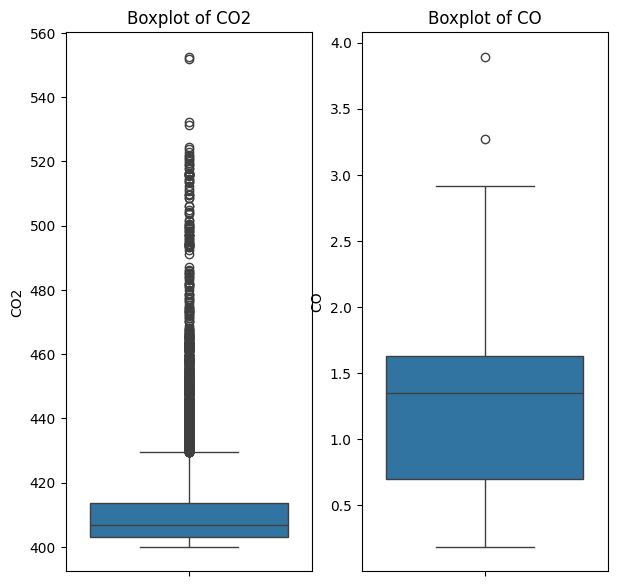

In [20]:
plt.figure(figsize=(7, 7))

plt.subplot2grid((2, 2), (0, 0), rowspan=2, colspan=1)
sns.boxplot( df_per_2menit['CO2'], label='CO2')
plt.title("Boxplot of CO2")


plt.subplot2grid((2, 2), (0, 1), rowspan=2, colspan=1)
sns.boxplot(df_per_2menit['CO'], label='CO')
plt.title("Boxplot of CO")
plt.show()

## **Preprocessing Data**

Melakukan pengecekan terhadap missing values dan data duplikat

In [21]:
df_per_2menit.isnull().sum()

CO2    294
CO     294
dtype: int64

In [22]:
df_per_2menit.duplicated().sum()

328

Melakukan imputasi terhadap missing value dengan interpolate untuk mencegah semakin mengecilnya ukuran data untuk training

In [23]:
df_per_2menit = df_per_2menit.interpolate(method='time')

In [24]:
df_per_2menit.isnull().sum()

CO2    0
CO     0
dtype: int64

In [25]:
df_per_2menit.duplicated().sum()

35

In [26]:
df_per_2menit[df_per_2menit.duplicated(keep=False)]

,CO2,CO
created_at,,
2024-12-11 13:48:00+00:00,400.568333,0.633333
2024-12-11 16:20:00+00:00,400.280000,0.495000
2024-12-11 17:04:00+00:00,400.280000,0.495000
2024-12-11 19:06:00+00:00,400.182857,0.478571
2024-12-11 19:16:00+00:00,400.180000,0.487143
...,...,...
2024-12-26 02:56:00+00:00,403.452857,1.435714
2024-12-29 10:00:00+00:00,403.016250,1.591250
2024-12-30 21:42:00+00:00,403.016250,1.591250


Data duplikat tidak dihapus dikarenakan data duplikat tersebut merupakan pembacaan CO2 dan CO yang sama namun bukan timestamp yang sama

Melakukan pembersihan outlier dengan imputasi dengan mean untuk mengantisipasi kesalahan pembacaan dari sensor

In [36]:
numeric_features = df_per_2menit.select_dtypes(include=['float64', 'int64']).columns

# Hitung Q1, Q3, dan IQR
Q1 = df_per_2menit[numeric_features].quantile(0.25)
Q3 = df_per_2menit[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Imputasi outlier dengan mean
for col in numeric_features:
    mean_val = df_per_2menit[col].mean()
    df_per_2menit[col] = df_per_2menit[col].mask((df_per_2menit[col] < lower_bound[col]) | (df_per_2menit[col] > upper_bound[col]), mean_val)

Boxplot setelah melakukan imputasi menggunakan mean terhadap outlier 

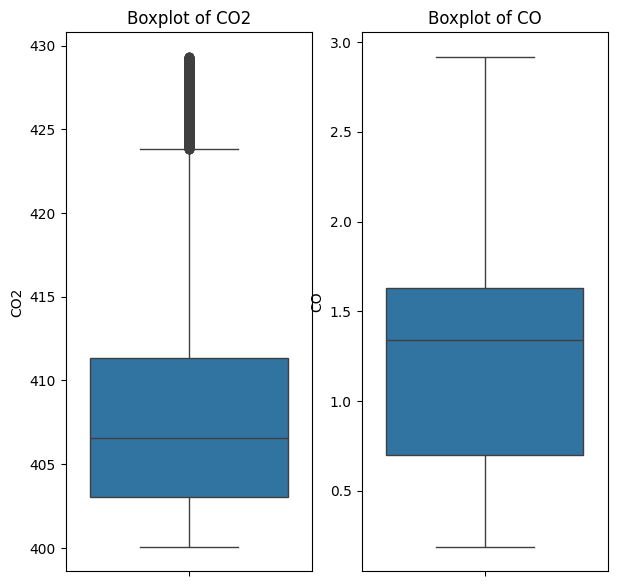

In [37]:
plt.figure(figsize=(7, 7))

plt.subplot2grid((2, 2), (0, 0), rowspan=2, colspan=1)
sns.boxplot( df_per_2menit['CO2'], label='CO2')
plt.title("Boxplot of CO2")


plt.subplot2grid((2, 2), (0, 1), rowspan=2, colspan=1)
sns.boxplot(df_per_2menit['CO'], label='CO')
plt.title("Boxplot of CO")
plt.show()

**Visualisasi Setelah melakukan imputasi dengan menggunakan mean**

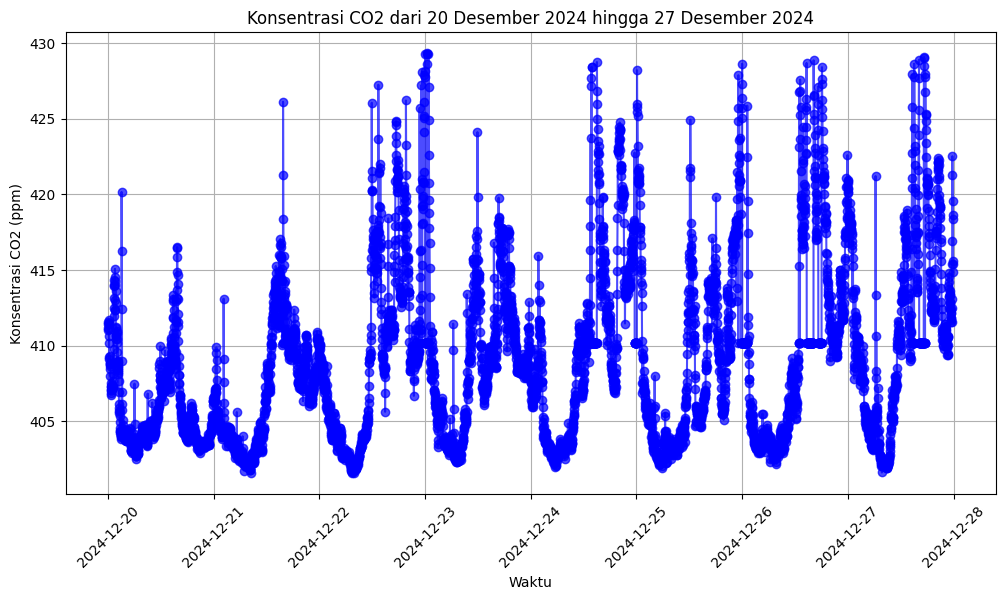

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df_per_2menit['CO2']['2024-12-20':'2024-12-27'].round(2), marker='o', color='blue', alpha=0.7)
plt.title('Konsentrasi CO2 dari 20 Desember 2024 hingga 27 Desember 2024')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi CO2 (ppm)')
plt.grid()
plt.xticks(rotation=45)
plt.show()

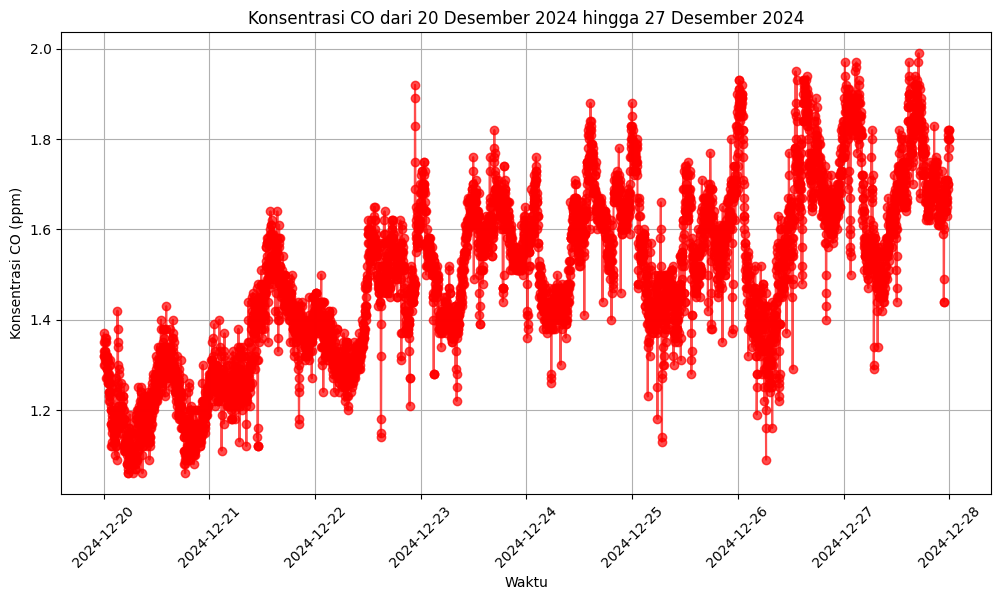

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(df_per_2menit['CO']['2024-12-20':'2024-12-27'].round(2), marker='o', color='red', alpha=0.7)
plt.title('Konsentrasi CO dari 20 Desember 2024 hingga 27 Desember 2024')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi CO (ppm)')
plt.grid()
plt.xticks(rotation=45)
plt.show()

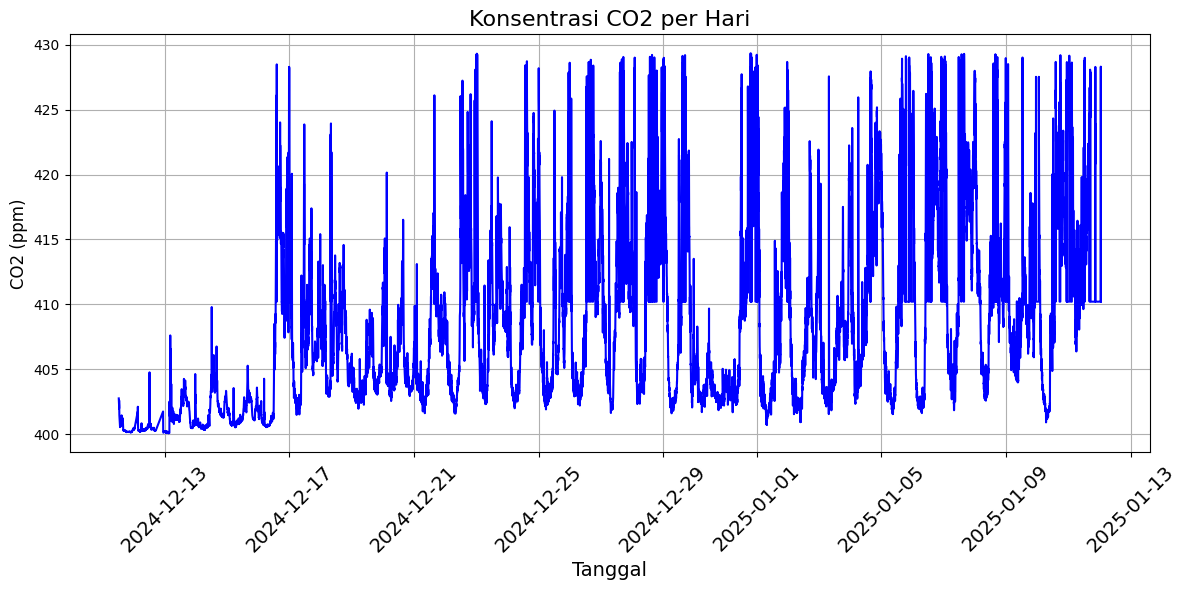

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_per_2menit, x='created_at', y='CO2', color='blue', markers='o')

plt.title('Konsentrasi CO2 per Hari', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('CO2 (ppm)', fontsize=12)
plt.xticks(rotation=45, fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

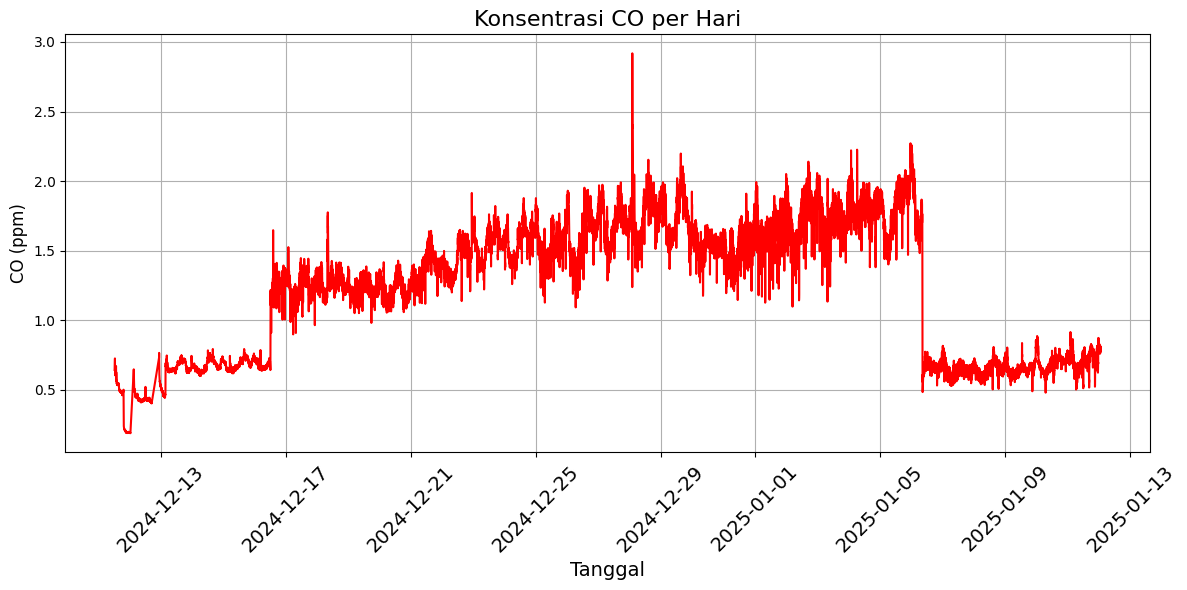

In [42]:
plt.figure(figsize=(12, 6))  
sns.lineplot(data=df_per_2menit, x='created_at', y='CO', color='red', markers='o')


plt.title('Konsentrasi CO per Hari', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('CO (ppm)', fontsize=12)
plt.xticks(rotation=45, fontsize=14)
plt.grid(True)


plt.tight_layout()
plt.show()